In [1]:
from hydra import initialize, compose

try:
    initialize(config_path="../configs", job_name="test")
except:
    pass

/tmp/ipykernel_3457/2986845305.py:4: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="../configs", job_name="test")


In [2]:
model_config = compose(config_name="model/faster_rcnn.yaml")

/home/hoang/miniconda3/envs/hoang/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'model/faster_rcnn.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [3]:
import pyrootutils
pyrootutils.setup_root('.', indicator=".project-root", pythonpath=True)
from src.models.detection_module import DetectionModule

model = DetectionModule.load_from_checkpoint('../checkpoints/last.ckpt')

/home/hoang/miniconda3/envs/hoang/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hoang/miniconda3/envs/hoang/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:263: UserWarning: Attribute 'detector' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['detector'])`.
  rank_zero_warn(


In [11]:
from hydra.utils import instantiate
data_config = compose(config_name="data/pascal_voc.yaml", overrides=["+data.val_data.root=../data"])
data = instantiate(data_config.data.val_data)

Using downloaded and verified file: ../data/VOCtrainval_06-Nov-2007.tar
Extracting ../data/VOCtrainval_06-Nov-2007.tar to ../data


In [ ]:
model.detector.roi_head.test_nms_cfg['nms_thr'] = 0.3

In [15]:
import torch
x = torch.tensor([0, 1, 2, 2])
expanded = torch.zeros((4, 4))
expanded[range(4), x] = 1
expanded

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]])

/home/hoang/miniconda3/envs/hoang/lib/python3.10/site-packages/torchvision/utils.py:210: UserWarning: boxes doesn't contain any box. No box was drawn
  warnings.warn("boxes doesn't contain any box. No box was drawn")


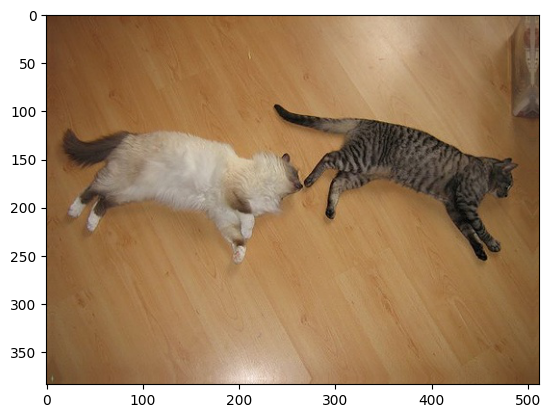

In [13]:
import torch
from src.structures import BatchDataSample
model.eval()
data_samples = BatchDataSample([data[4]])
with torch.no_grad():
    det_results = model.predict_step(data_samples)

det_results[0].visualize(backend="matplot")